In [49]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
from scipy.stats import norm
%matplotlib inline

In [50]:
tickers = ['^DJI', '^GSPC', '^IXIC']

In [51]:
data = pd.DataFrame()
for i in tickers:
    data[i] = wb.DataReader(i, data_source = 'yahoo', start = '2008-1-1')['Adj Close']

In [72]:
def mc(ticker, t_intervals= 300,  iterations = 10):
    log_returns = np.log(1+ data[f'{ticker}'].pct_change())
    u = log_returns.mean()
    var = log_returns.var()
    drift = u - (.5 * var)
    stdev = log_returns.std()
    my_drift = np.array(drift)
    my_stdev = np.array(stdev)
    daily_returns = np.exp(my_drift + my_stdev * norm.ppf(np.random.rand(t_intervals, iterations)))
    day_zero = data[f'{ticker}'].iloc[-1]
    p_list = np.zeros_like(daily_returns)
    p_list[0] = day_zero
    for t in range(1, t_intervals):
        p_list[t] = p_list[t-1] * daily_returns[t]
    

    plt.figure(figsize = (10,6))
    plt.title(f"{ticker}")
    return plt.plot(p_list)

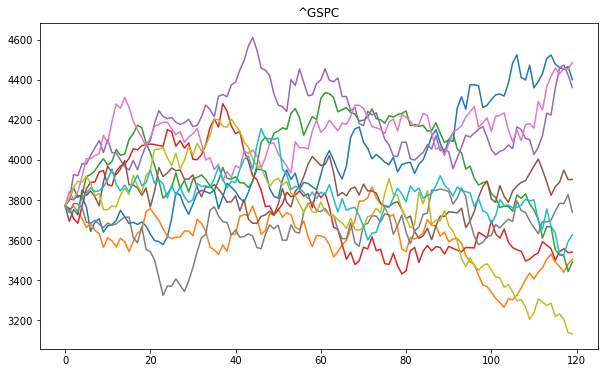

In [76]:
mc('^GSPC', 120)